<a href="https://colab.research.google.com/github/BoyWhoLived12/MNIST_GAN/blob/main/GANS1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Activation, Flatten, LeakyReLU, Dropout


In [26]:
def get_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = X_train.reshape(60000, 784)

    return (X_train, y_train, X_test, y_test)

In [41]:
import matplotlib.pyplot as plt


In [48]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

In [9]:
np.random.seed(10)
random_dim = 100

In [12]:
from tensorflow.keras import initializers

In [34]:
def get_discriminator(optimizer=Adam(learning_rate=0.0002)):
    model = Sequential()

    model.add(Dense(1024,  input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [29]:
def get_generator(optimizer=Adam(learning_rate=0.0002)):
    model = Sequential()
    model.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))

    model.add(Dense(512))
    model.add(LeakyReLU(0.2))

    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))

    model.add(Dense(784, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [30]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [31]:
def get_gan_network(discriminator, random_dim, generator, optimizer=Adam(learning_rate=0.0002)):

    discriminator.trainable = False

    gan_input = Input(shape=(random_dim, ))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan  = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan


In [36]:
from tqdm import tqdm

In [46]:
def train(epochs=10, batch_size=128):

    #1
    x_train, y_train, x_test, y_test = get_data()
    batch_count = x_train.shape[0] / batch_size

    #2
    adam = Adam(learning_rate=0.0002)
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    
    #3
    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(int(batch_count))):
            
            #4
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            #5
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            #6
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9

            #7
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            #8
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        
        if e == 1 or e % 3 == 0:
            plot_generated_images(e, generator)

--------------- Epoch 1 ---------------


100%|██████████| 468/468 [01:28<00:00,  5.29it/s]


--------------- Epoch 2 ---------------


100%|██████████| 468/468 [01:26<00:00,  5.43it/s]


--------------- Epoch 3 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.47it/s]


--------------- Epoch 4 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.49it/s]


--------------- Epoch 5 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.49it/s]


--------------- Epoch 6 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.50it/s]


--------------- Epoch 7 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.51it/s]


--------------- Epoch 8 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.49it/s]


--------------- Epoch 9 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.49it/s]


--------------- Epoch 10 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.51it/s]


--------------- Epoch 11 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.48it/s]


--------------- Epoch 12 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.50it/s]


--------------- Epoch 13 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.46it/s]


--------------- Epoch 14 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.49it/s]


--------------- Epoch 15 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.52it/s]


--------------- Epoch 16 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.51it/s]


--------------- Epoch 17 ---------------


100%|██████████| 468/468 [01:26<00:00,  5.43it/s]


--------------- Epoch 18 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.52it/s]


--------------- Epoch 19 ---------------


100%|██████████| 468/468 [01:26<00:00,  5.42it/s]


--------------- Epoch 20 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.47it/s]


--------------- Epoch 21 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.56it/s]


--------------- Epoch 22 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.56it/s]


--------------- Epoch 23 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.47it/s]


--------------- Epoch 24 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.52it/s]


--------------- Epoch 25 ---------------


100%|██████████| 468/468 [01:24<00:00,  5.52it/s]


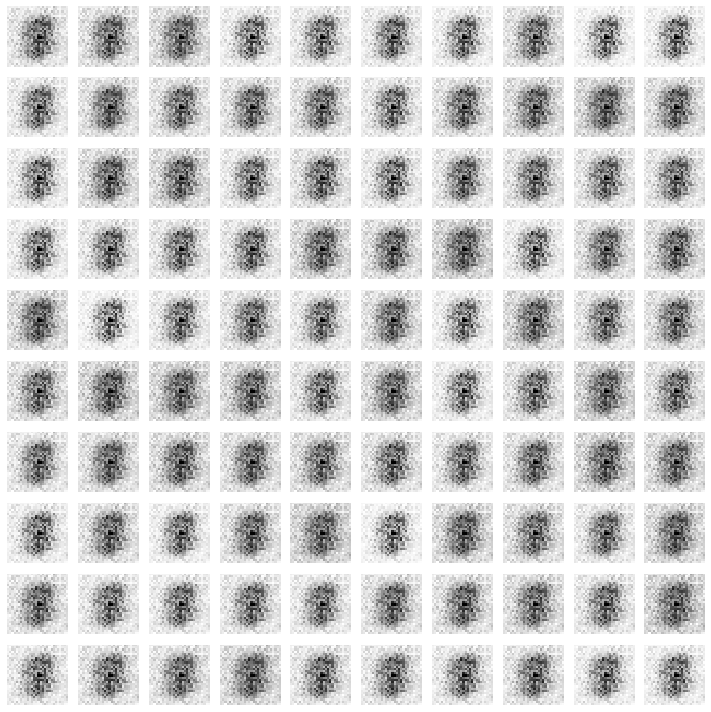

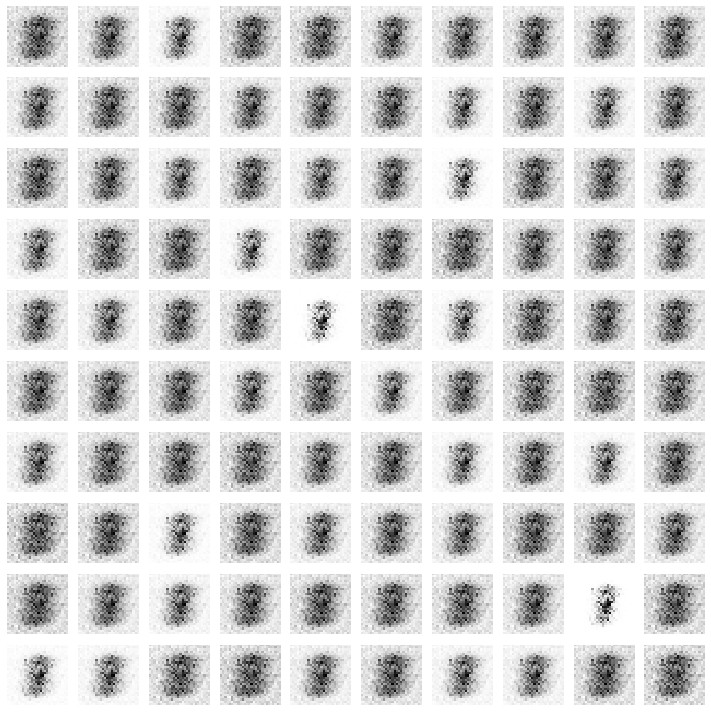

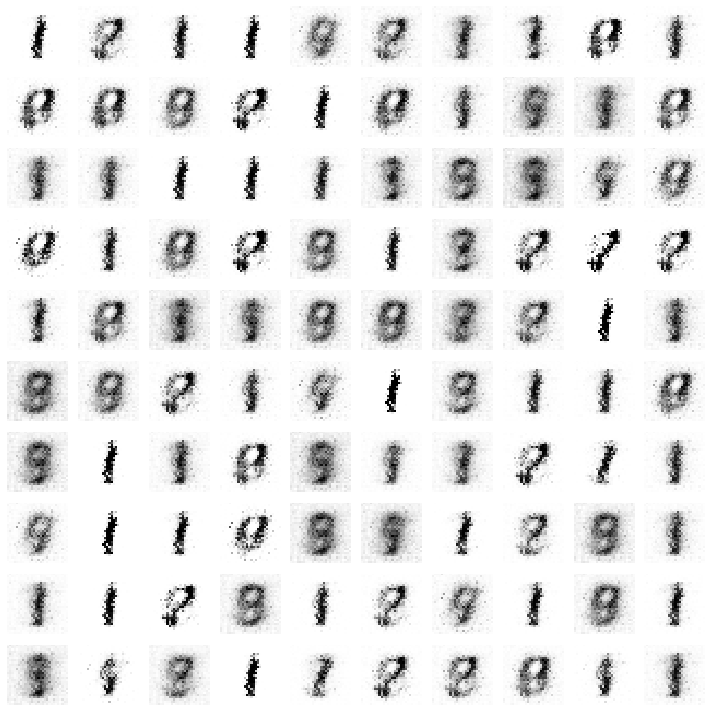

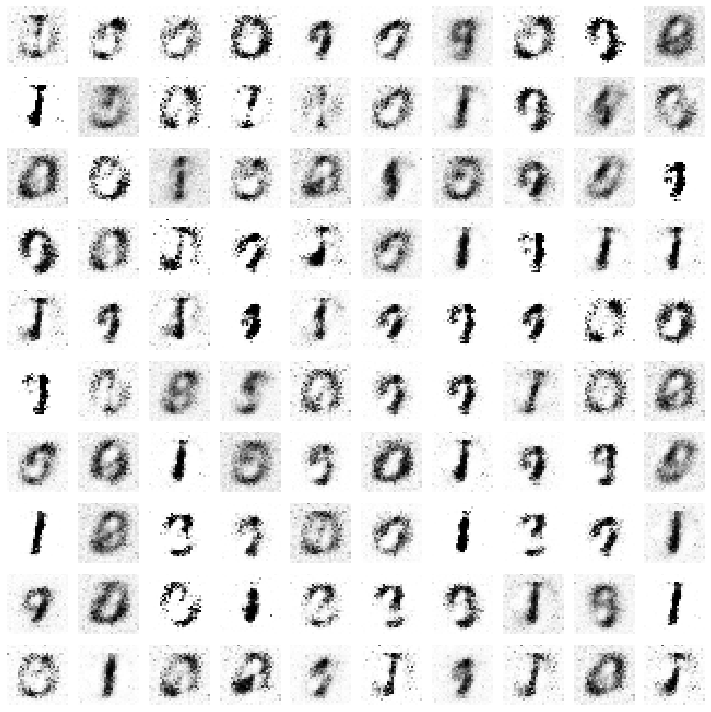

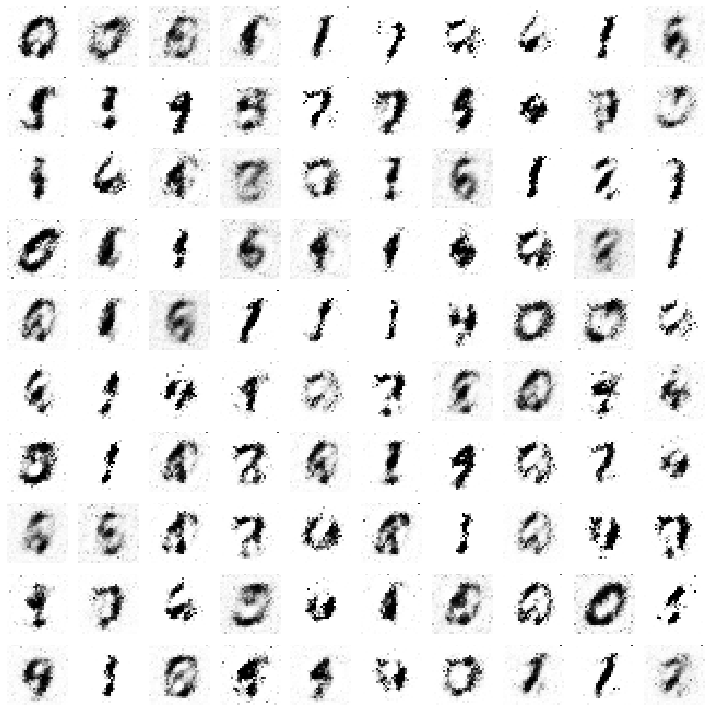

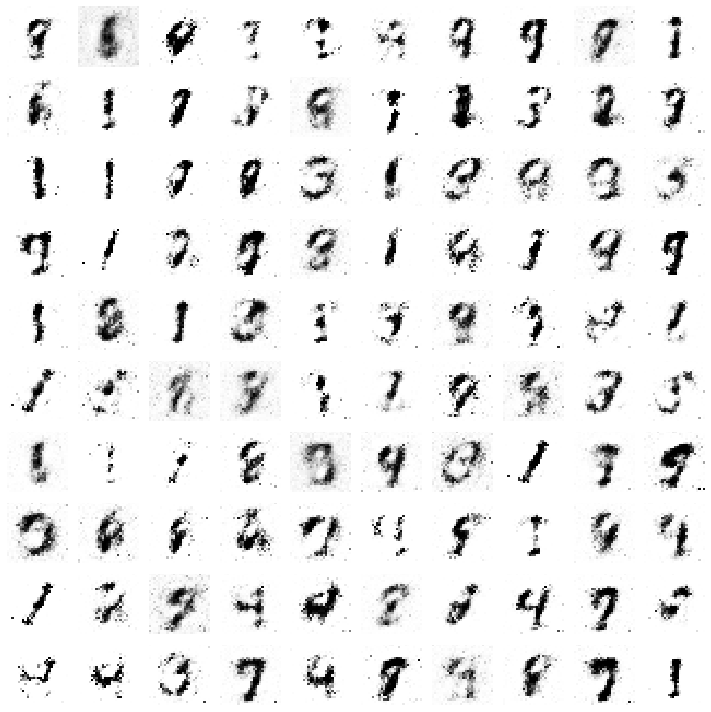

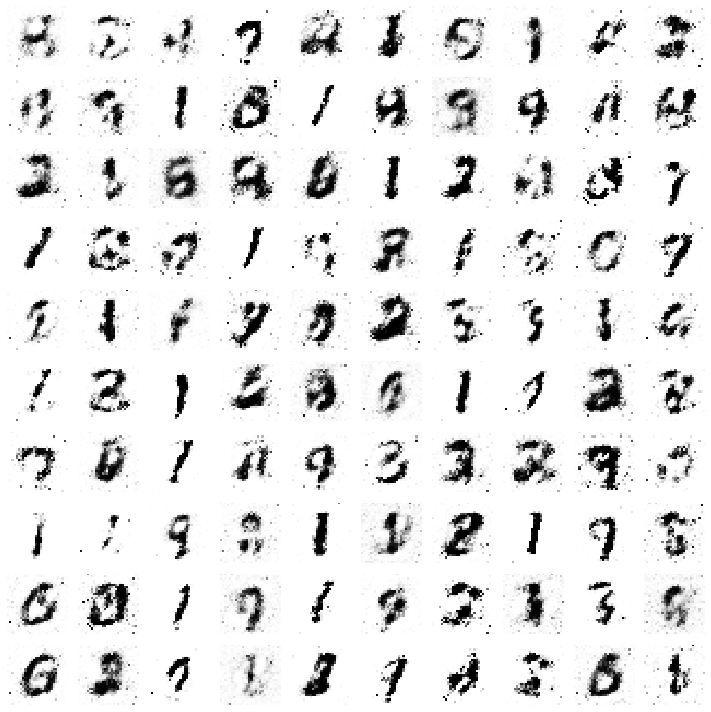

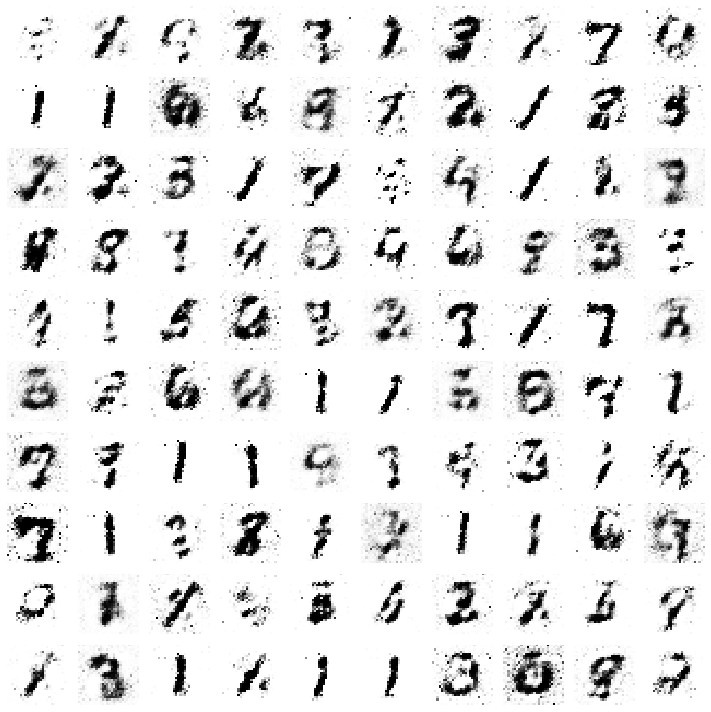

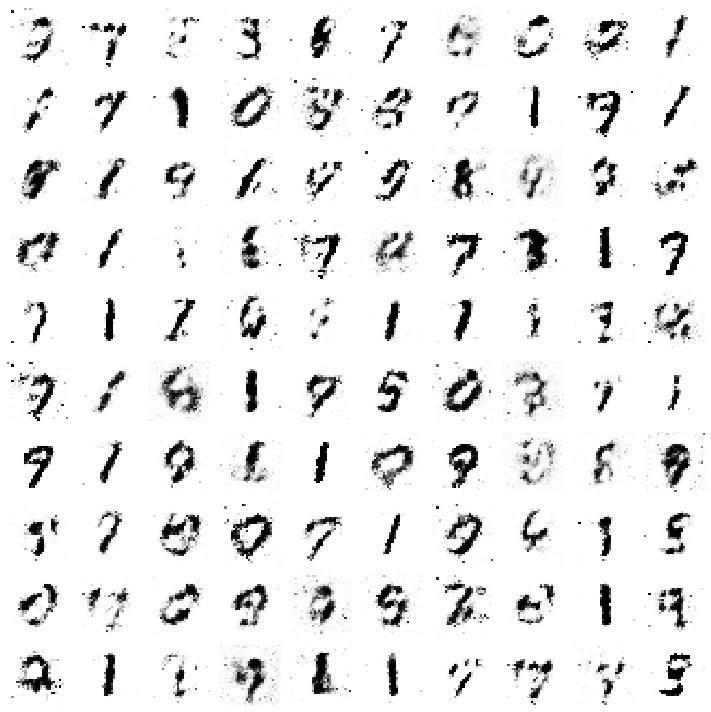

In [50]:
train(25)